# MIST data from Urchs et al data note.

A notebook to do an exploratory analysis / visualization of some of the contents of the article:

MIST: A multi-resolution parcellation of functional brain networks 
by: 
Sebastian Urchs, Jonathan Armoza,Yassine Benhajali, Jolène St-Aubin, Pierre Orban, Pierre Bellec

Available at: https://mniopenresearch.org/articles/1-3/v1

Data hosted at: https://figshare.com/articles/_/5633638

##### Imports

In [13]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt 
%matplotlib inline  
from mpl_toolkits.mplot3d import Axes3D

import nibabel as nib # To load the atom file.



#### Load the MIST parcellations at all resolutions:
 - Size: The size of the parcel in 3mm isotropic voxels

In [14]:
source = 'Z:\Open data sets\MNI open data\MIST_parcellation\Release\Parcel_Information\MIST_'
resolution_array=[7,12,20,36,64,122,197,325,444]

#### Load each file into a subsequent dataframe.
Load the parcel_info with semicolon seperated values.

In [15]:
df_list=[]
source = 'Z:\Open data sets\MNI open data\MIST_parcellation\Release\Parcel_Information\MIST_'
resolution_array=[7,12,20,36,64,122,197,325,444]
for i in range(0,len(resolution_array)):
    reso = resolution_array[i]
    thisfile = source + str(reso) + '.csv'
    temp_df = pd.read_csv(thisfile,  sep = ';') #+|\t+|\s+\t+|\t+\s+')               
    df_list.append(temp_df)

In [16]:
for i in range(0,len(resolution_array)):
    display(df_list[i])

,roi,label,name,size,symmetry,laterality,x,y,z,neighbour,parent,overlap
0,1,CER,CEREBELLUM,7228,0.96,0.014,-0.41,-64.36,-35.89,"[2, 4, 6]",NaN,0
1,2,LIMnet,MESOLIMBIC_NETWORK,5556,0.87,0.013,-0.60,1.39,-21.82,"[1, 4, 5, 6, 7]",NaN,0
2,3,MOTnet,SOMATOMOTOR_NETWORK,4780,0.89,0.004,-0.29,-20.89,54.05,"[5, 6, 7]",NaN,0
3,4,VISnet,VISUAL_NETWORK,6728,0.90,-0.047,1.40,-78.78,7.01,"[1, 2, 5, 6]",NaN,0
4,5,DMnet,DEFAULT_MODE_NETWORK,8986,0.78,0.111,-4.37,0.00,14.04,"[2, 3, 4, 6, 7]",NaN,0
5,6,FPnet_VISDN,FRONTO_PARIETAL_NETWORK_and_VISUAL_DOWNSTREAM,12206,0.78,-0.053,2.09,-13.48,22.88,"[1, 2, 3, 4, 5, 7]",NaN,0
6,7,VATTnet_SALnet_BG_THAL,VENTRAL_ATTENTION_NETWORK_and_SALIENCE_NETWORK...,12306,0.86,0.004,-0.29,-9.26,24.52,"[2, 3, 5, 6]",NaN,0


,roi,label,name,size,symmetry,laterality,x,y,z,neighbour,parent,overlap
0,1,BG_THAL,BASAL_GANGLIA_and_THALAMUS,2476,0.92,0.000,-0.43,-2.65,5.04,"[2, 3, 8, 11]",7,1.000000
1,2,AUDnet_PINS,AUDITORY_NETWORK_and_POSTERIOR_INSULA,2947,0.86,0.031,-2.37,-17.81,8.52,"[1, 3, 4, 7, 10, 11]",7,1.000000
2,3,LIMnet,MESOLIMBIC_NETWORK,5556,0.87,0.013,-0.60,1.39,-21.82,"[1, 2, 4, 5, 6, 8, 9, 10, 11, 12]",2,1.000000
3,4,DMnet_l,DEFAULT_MODE_NETWORK_lateral,3688,0.78,0.043,-1.81,-20.80,-1.27,"[2, 3, 8, 9, 10, 11]",5,0.930315
4,5,VISnet,VISUAL_NETWORK,6347,0.89,-0.056,1.58,-79.25,5.54,"[3, 6, 9, 12]",4,1.000000
5,6,DMnet_pm,DEFAULT_MODE_NETWORK_posteromedial,2002,0.88,0.038,-0.73,-55.67,28.55,"[3, 5, 7, 9, 11]",5,0.809690
6,7,MOTnet,SOMATOMOTOR_NETWORK,4738,0.89,0.013,-0.35,-20.69,53.91,"[2, 6, 9, 10, 11]",3,1.000000
7,8,DMnet_am_lhAG,DEFAULT_MODE_NETWORK_anteromedial_and_left_ANG...,4030,0.79,0.135,-5.07,38.08,21.80,"[1, 3, 4, 9, 10, 11]",5,0.976179
8,9,VVIS_DVIS,VENTRAL_VISUAL_STREAM_and_DORSAL_VISUAL_STREAM,4744,0.79,0.043,-2.11,-59.96,21.08,"[3, 4, 5, 6, 7, 8, 10, 11, 12]",6,0.991147
9,10,FPnet,FRONTO_PARIETAL_NETWORK,6275,0.73,-0.095,3.92,13.95,24.93,"[2, 3, 4, 7, 8, 9, 11]",6,0.983267


,roi,label,name,size,symmetry,laterality,x,y,z,neighbour,parent,overlap
0,1,BG_THAL,BASAL_GANGLIA_and_THALAMUS,2476,0.92,0.000,-0.43,-2.65,5.04,"[3, 5, 8, 10, 19]",1,1.000000
1,2,MOTnet_v,SOMATOMOTOR_NETWORK_ventral,913,0.78,0.025,-2.15,-5.03,28.29,"[7, 8, 11, 12, 13, 19]",7,1.000000
2,3,ORBcor_NACC,ORBITOFRONTAL_CORTEX_and_NUCLEUS_ACCUMBENS,1411,0.81,0.060,-1.91,31.59,-17.84,"[1, 5, 10, 18, 19, 20]",3,1.000000
3,4,ASCER,ASSOCIATIVE_CEREBELLUM,3445,0.87,0.057,-1.57,-54.11,-35.64,"[9, 10, 15, 16, 17]",12,1.000000
4,5,PGACcor_VMPFcor,PERIGENUAL_ANTERIOR_CINGULATE_CORTEX_and_VENTR...,1335,0.92,0.034,-0.49,45.41,0.63,"[1, 3, 13, 20]",8,1.000000
5,6,ITgyr_Tpol,INFERIOR_TEMPORAL_GYRUS_and_TEMPORAL_POLE,1700,0.85,0.016,-0.31,-7.33,-33.64,"[10, 16, 18]",3,1.000000
6,7,FPTCnet,FRONTO_PARIETAL_TASK_CONTROL_NETWORK,2442,0.72,-0.118,4.97,9.36,26.13,"[2, 8, 11, 12, 13, 16, 18, 19, 20]",10,1.000000
7,8,AUDnet_PINS,AUDITORY_NETWORK_and_POSTERIOR_INSULA,2575,0.86,0.050,-3.23,-19.86,10.46,"[1, 2, 7, 10, 13, 18, 19, 20]",2,0.981359
8,9,MVISnet,MEDIAL_VISUAL_NETWORK,2694,0.84,0.023,-0.23,-74.90,12.55,"[4, 10, 14, 15, 16, 17]",5,1.000000
9,10,AMY_HIPP_Pisul,AMYGDALA_and_HIPPOCAMPUS_and_Peri_Insular_Sulcus,2445,0.86,-0.016,-0.05,-9.97,-15.90,"[1, 3, 4, 6, 8, 9, 14, 16, 18, 19, 20]",3,1.000000


,roi,label,name,size,symmetry,laterality,x,y,z,neighbour,parent,overlap
0,1,CER5,CEREBELLUM_I-V,747,0.91,0.007,-0.40,-46.11,-23.17,"[5, 13, 16, 24, 26, 30]",4,1.000000
1,2,PUT,PUTAMEN,1033,0.88,0.032,-1.18,1.38,1.51,"[8, 10, 19, 25, 28, 30]",1,1.000000
2,3,MOTnet_vl,SOMATOMOTOR_NETWORK_ventrolateral,913,0.78,0.025,-2.15,-5.03,28.29,"[9, 21, 25, 28, 33, 35, 36]",2,1.000000
3,4,PCcor_PRC,POSTERIOR_CINGULATE_CORTEX_and_PRECUNEUS,776,0.81,-0.048,0.70,-48.75,32.07,"[14, 22, 26, 32]",14,1.000000
4,5,CER9,CEREBELLUM_IX,966,0.87,0.062,-0.57,-53.31,-45.54,"[1, 6, 13, 20, 30]",4,1.000000
5,6,CER7b,CEREBELLUM_VIIb,816,0.66,-0.104,-0.10,-71.52,-52.09,"[5, 7, 13, 20]",17,1.000000
6,7,CERCR1,CEREBELLUM_CRUSI,1133,0.76,0.098,-3.75,-79.71,-21.90,"[6, 13, 16, 17, 20, 24, 26]",17,1.000000
7,8,THAL_CAUDN,THALAMUS_and_CAUDATE_NUCLEUS,1443,0.87,-0.023,0.11,-5.54,7.58,"[2, 10, 18, 28, 30]",1,1.000000
8,9,MOTnet_dl,SOMATOMOTOR_NETWORK_dorsolateral,1026,0.65,-0.166,6.80,-17.21,54.68,"[3, 15, 21, 23, 33, 35]",11,1.000000
9,10,ORBcor_NACC,ORBITOFRONTAL_CORTEX_and_NUCLEUS_ACCUMBENS,1411,0.81,0.060,-1.91,31.59,-17.84,"[2, 8, 18, 19, 28, 30, 34]",3,1.000000


,roi,label,name,size,symmetry,laterality,x,y,z,neighbour,parent,overlap
0,1,PUT,PUTAMEN,1033,0.88,0.032,-1.18,1.38,1.51,"[2, 4, 8, 17, 18, 25, 36, 41, 46, 51]",2,1.000000
1,2,PINS_v,POSTERIOR_INSULA_ventral,420,0.66,0.024,-2.01,-7.26,-3.49,"[1, 18, 24, 36, 46, 51, 64]",19,1.000000
2,3,CERVM,CEREBELLUM_VERMIS,360,0.80,0.003,0.20,-45.23,-8.42,"[4, 6, 16, 25, 29, 35, 38, 48, 58]",30,1.000000
3,4,THAL,THALAMUS,805,0.90,-0.050,0.70,-18.24,6.00,"[1, 3, 17, 25]",8,1.000000
4,5,CER7ab,CEREBELLUM_VIIIab,517,0.83,0.060,-1.59,-53.96,-51.08,"[11, 15, 29, 44, 48]",13,1.000000
5,6,CER5,CEREBELLUM_I-V,747,0.91,0.007,-0.40,-46.11,-23.17,"[3, 16, 25, 28, 29, 35, 38, 48]",1,1.000000
6,7,ACcor_d,ANTERIOR_CINGULATE_CORTEX_dorsal,404,0.77,0.074,-0.29,20.72,28.48,"[10, 21, 34, 39, 52, 60]",29,1.000000
7,8,CAUDNH_NACC,CAUDATE_NUCLEUS_HEAD_and_NUCLEUS_ACCUMBENS,285,0.83,0.046,-0.84,11.28,-11.21,"[1, 17, 25, 34, 36, 41, 42]",10,1.000000
8,9,TP,TEMPORAL_POLE,753,0.73,0.254,-11.53,5.35,-40.93,"[22, 24, 25, 36]",12,1.000000
9,10,DMPFcor_p,DORSOMEDIAL_PREFRONTAL_CORTEX_posterior,372,0.68,-0.032,0.02,30.65,40.42,"[7, 34, 39, 52, 60, 61]",29,1.000000


,roi,label,name,size,symmetry,laterality,x,y,z,neighbour,parent,overlap
0,1,SPlob,SUPERIOR_PARIETAL_LOBULE,206,0.76,-0.136,0.57,-25.70,73.98,"[28, 64, 67, 68, 76, 113, 116, 118, 122]",62,1.000000
1,2,CAUDN_v,CAUDATE_ventral,139,0.56,-0.367,3.95,20.63,-1.68,"[10, 13, 25, 35, 45, 61, 78]",17,1.000000
2,3,CERVM,CEREBELLUM_VERMIS,360,0.80,0.003,0.20,-45.23,-8.42,"[29, 36, 40, 42, 44, 48, 51, 65, 72, 79, 103]",3,1.000000
3,4,L_IPlob,left_INFERIOR_PARIETAL_LOBULE,206,0.00,1.000,-48.23,-65.34,33.46,"[33, 50, 74, 100, 114]",20,1.000000
4,5,MOTnet_am,SOMATOMOTOR_NETWORK_anteromedial,229,0.63,0.218,-2.95,-12.06,52.55,"[26, 28, 67, 68, 113, 118, 122]",45,1.000000
5,6,ACcor_d,ANTERIOR_CINGULATE_CORTEX_dorsal,404,0.77,0.074,-0.29,20.72,28.48,"[26, 27, 34, 55, 91, 115, 122]",7,1.000000
6,7,L_MFgyr_pr,left_MIDDLE_FRONTAL_GYRUS_posterorostral,350,0.00,1.000,-41.13,17.73,39.99,"[22, 38, 53, 105, 110, 113]",63,1.000000
7,8,L_MOTnet_dl,left_SOMATOMOTOR_NETWORK_dorsolateral,229,0.00,1.000,-40.99,-22.62,61.90,"[68, 93, 110, 113, 116]",56,1.000000
8,9,CER6_p,CEREBELLUM_VI_posterior,159,0.79,0.038,-0.36,-75.94,-33.25,"[11, 18, 41, 44, 46, 84, 90, 97, 121]",29,1.000000
9,10,CAUDN_d,CAUDATE_dorsal,235,0.75,0.157,-3.08,4.85,17.60,"[2, 13, 25, 31, 45, 85]",17,1.000000


,roi,label,name,size,symmetry,laterality,x,y,z,neighbour,parent,overlap
0,1,r1@197,1@MIST_197,139,0.56,-0.367,3.95,20.63,-1.68,"[10, 18, 34, 54, 100, 116, 156]",NaN,0
1,2,r2@197,2@MIST_197,170,0.64,0.076,0.09,17.41,35.34,"[11, 58, 120, 124, 125, 133, 187]",NaN,0
2,3,r3@197,3@MIST_197,176,0.77,-0.034,-0.10,-48.01,-37.03,"[14, 15, 27, 33, 42, 84, 118, 191]",NaN,0
3,4,r4@197,4@MIST_197,138,0.62,0.065,-0.91,-57.50,17.57,"[16, 30, 42, 62, 70, 74, 114, 121, 132, 169, 178]",NaN,0
4,5,r5@197,5@MIST_197,158,0.00,-1.000,36.70,23.11,10.57,"[10, 34, 41, 54, 69, 87, 96, 97, 113, 135, 170...",NaN,0
5,6,r6@197,6@MIST_197,143,0.00,-1.000,49.59,-63.73,5.93,"[67, 75, 123, 181, 185]",NaN,0
6,7,r7@197,7@MIST_197,166,0.65,0.024,-1.52,-77.54,34.04,"[19, 75, 83, 107, 111, 134, 140, 149, 150, 167]",NaN,0
7,8,r8@197,8@MIST_197,148,0.42,-0.392,5.53,-13.55,-0.54,"[9, 10, 21, 26, 28, 43, 54]",NaN,0
8,9,r9@197,9@MIST_197,244,0.57,-0.221,3.12,-13.96,5.72,"[8, 10, 26, 43]",NaN,0
9,10,r10@197,10@MIST_197,415,0.70,-0.065,1.23,6.63,-2.38,"[1, 5, 8, 9, 18, 21, 23, 28, 34, 54, 87, 91, 1...",NaN,0


,roi,label,name,size,symmetry,laterality,x,y,z,neighbour,parent,overlap
0,1,r1@325,1@MIST_325,98,0.00,1.000,-54.49,-50.59,43.28,"[31, 74, 96, 109, 229, 283]",127,1.000000
1,2,r2@325,2@MIST_325,103,0.00,-1.000,63.64,-20.66,-15.69,"[23, 139, 175, 193, 210, 295]",168,1.000000
2,3,r3@325,3@MIST_325,99,0.00,-1.000,25.45,-66.12,-6.12,"[20, 146, 173, 183, 187, 264, 285, 313, 322]",85,1.000000
3,4,r4@325,4@MIST_325,122,0.00,-1.000,35.26,12.67,-40.24,"[14, 65, 176, 221, 292]",145,1.000000
4,5,r5@325,5@MIST_325,80,0.00,-1.000,60.49,-9.29,36.02,"[48, 104, 116, 199, 274, 280, 298]",101,1.000000
5,6,r6@325,6@MIST_325,153,0.00,1.000,-55.75,-23.29,-24.75,"[45, 51, 54, 111, 125, 166, 177, 222, 232, 243...",117,1.000000
6,7,r7@325,7@MIST_325,94,0.00,-1.000,29.39,-89.24,9.81,"[56, 202, 203, 254, 264, 276, 285]",152,1.000000
7,8,r8@325,8@MIST_325,95,0.63,0.232,-1.39,-56.86,-60.96,"[28, 46, 136, 138, 267, 296]",15,1.000000
8,9,r9@325,9@MIST_325,76,0.00,-1.000,33.16,-3.41,46.91,"[25, 48, 66, 116, 155, 156, 211, 274, 315]",190,1.000000
9,10,r10@325,10@MIST_325,96,0.00,-1.000,38.50,-57.25,-53.59,"[57, 153, 158, 239, 246, 296, 321]",79,1.000000


,roi,label,name,size,symmetry,laterality,x,y,z,neighbour,parent,overlap
0,1,r1@444,1@MIST_444,110,0.00,-1.000,17.89,26.79,47.06,"[142, 147, 169, 176, 179, 192, 230, 247, 249, ...",59,1.000000
1,2,r2@444,2@MIST_444,119,0.72,-0.059,-0.73,22.12,-17.10,"[4, 40, 41, 79, 174, 182, 197, 212, 236, 349, ...",182,1.000000
2,3,r3@444,3@MIST_444,112,0.00,1.000,-40.71,37.84,6.38,"[22, 149, 158, 238, 254, 327, 375, 399, 429, 439]",85,1.000000
3,4,r4@444,4@MIST_444,109,0.87,0.064,-0.36,15.49,-10.04,"[2, 41, 79, 100, 174, 182, 212, 404, 441]",26,1.000000
4,5,r5@444,5@MIST_444,95,0.63,0.232,-1.39,-56.86,-60.96,"[104, 213, 253, 279, 288, 384, 430, 444]",8,1.000000
5,6,r6@444,6@MIST_444,107,0.00,1.000,-30.03,-64.79,31.06,"[69, 77, 164, 178, 211, 267, 276, 295, 358, 36...",277,1.000000
6,7,r7@444,7@MIST_444,91,0.00,1.000,-34.95,-78.37,-6.95,"[8, 14, 21, 153, 226, 235, 298, 300, 337, 389,...",133,1.000000
7,8,r8@444,8@MIST_444,102,0.00,1.000,-30.76,-90.03,6.82,"[7, 21, 103, 117, 235, 276, 298, 300, 444]",318,1.000000
8,9,r9@444,9@MIST_444,115,0.00,1.000,-53.53,8.03,-26.42,"[62, 72, 112, 119, 198, 256, 261, 315, 354, 38...",98,1.000000
9,10,r10@444,10@MIST_444,80,0.48,0.025,-0.30,-54.03,60.10,"[80, 164, 193, 206, 237, 268, 270, 271, 273, 2...",22,1.000000


### A few plots

3D scatter of all the points at the highest resolution.

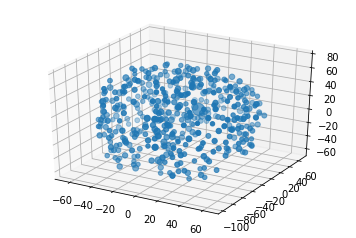

In [17]:
x = np.array(df_list[-1]['x'])
y = np.array(df_list[-1]['y'])
z = np.array(df_list[-1]['z'])

# because the voxels are volume and the circles are area
s = np.array(df_list[-1]['size'])
s = np.cbrt(s)
s = np.square(s)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, zdir='z', s=s)


Make an animated version of the plot above.

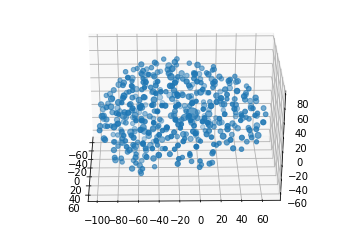

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, zdir='z', s=s)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    figname='brainRegions_s444_3Dscatter_angle' + str(angle) + '.png'
    plt.savefig(figname)

Get an idea of the number of cells in each region
Using estimates:
 - ~630,000 cells per voxel (cpv)
 - size measure in MNIST paper is the number of voxels.
 - ~5% stained by golgi method (to reduce computational demands while staying relevant.

In [20]:
cpv = 630000
n_cells = cpv * np.array(df_list[-1]['size'])
print('Estimated number of cells: ' + str(sum(n_cells) / 1e9) + ' billion')

Estimated number of cells: 36.4077 billion


Do a reality check to see how this matches estimated number of neurons in the brain.
 - Rough estimate is 100 billion in early text with no references cited.
 - More recent estimate: 21-26 billion in cortex, and 101 billion in cerebellum.
 - Therefore, an estimate of ~36 billion falls within the correct order of magnitude.

### Explore the atom files

MIST Atom

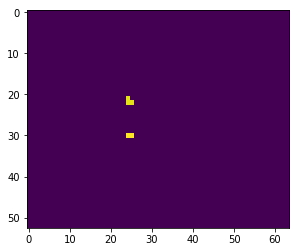

In [21]:
nib_file = 'Z:\Open data sets\MNI open data\MIST_parcellation\Release\Parcellations\MIST_ATOM.nii.gz'
img1 = nib.load(nib_file)
data1 = img1.get_data()
plt.imshow(data1[:,:,50])

MIST_444

(53, 64, 52)


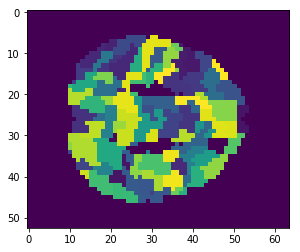

In [22]:
nib_file = 'Z:\Open data sets\MNI open data\MIST_parcellation\Release\Parcellations\MIST_444.nii.gz'
img2 = nib.load(nib_file)
data2 = img2.get_data()
print(data2.shape)
plt.imshow(data2[:,:,40])

### Determine the areas functionally related at each resolution.

Load the hierarchy file into a pandas dataframe

In [23]:
this_file_path =  'Z:\Open data sets\MNI open data\MIST_parcellation\Release\Hierarchy\MIST_PARCEL_ORDER.csv'
hierarchy_df = pd.read_csv(this_file_path,  sep = ',') #+|\t+|\s+\t+|\t+\s+')               
display(hierarchy_df)

,s7,s12,s20,s36,s64,s122,s197,s325,s444,sATOM
0,1,12,4,1,6,48,84,13,101,1024
1,1,12,4,1,6,48,84,13,101,1030
2,1,12,4,1,6,48,84,134,218,1022
3,1,12,4,1,6,48,84,134,218,1023
4,1,12,4,1,6,48,84,134,218,1085
5,1,12,4,1,6,48,191,18,50,1026
6,1,12,4,1,6,48,191,18,50,1031
7,1,12,4,1,6,48,191,88,251,1028
8,1,12,4,1,6,48,191,88,251,1034
9,1,12,4,1,6,48,191,88,251,1087


##### Create animated 3D scatters for each region of the lowest resolution

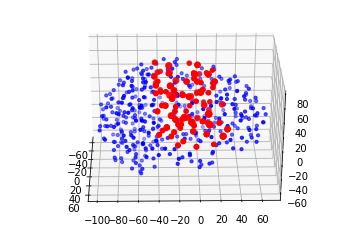

In [24]:
n_parcel = 7 # Which area of the brain
contains = hierarchy_df['s7'] == n_parcel
contains = np.asarray(contains)
indexes=np.where(contains==1)
start_ind = indexes[0][0]
end_ind = indexes[0][-1]

rois=hierarchy_df.loc[start_ind:end_ind,['s444']]
rois=np.squeeze(np.asarray(rois))
# print(rois)

coords_array = np.empty([len(rois),4])
for i in range(0,len(rois)):
    coords_array[i,0] = df_list[-1].loc[rois[i]-1,['x']]
    coords_array[i,1] = df_list[-1].loc[rois[i]-1,['y']]
    coords_array[i,2] = df_list[-1].loc[rois[i]-1,['z']]
    coords_array[i,3] = df_list[-1].loc[rois[i]-1,['size']]


# # Plot all the points
x_all = np.array(df_list[-1]['x'])
y_all = np.array(df_list[-1]['y'])
z_all = np.array(df_list[-1]['z'])
s_all = 10 # Use a constant size for all points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_all,y_all,z_all, zdir='z', s=s_all, c='b')


xi = coords_array[:,0]
yi = coords_array[:,1]
zi = coords_array[:,2]
si = coords_array[:,3]
si = np.cbrt(si) # Size correction
si = np.square(si)

ax.scatter(xi,yi,zi, zdir='z', s=si, c='r') # Plot the network of interest in red.

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    figname='brainRegions3Dscatter_nParcel_'+str(n_parcel)+' angle' + str(angle) + '.png'
    plt.savefig(figname)

### Find siblings and cousins at different resolutions
For each location @ 444 resolution, find a list of all corresponding family members (print a list for each level)


Begin by going through hierarchy_df and removing doubled rows.

In [25]:
resolution_list=['s7','s12','s20','s36','s64','s122','s197','s325','s444']
this_file_path =  'Z:\Open data sets\MNI open data\MIST_parcellation\Release\Hierarchy\MIST_PARCEL_ORDER.csv'
hierarchy_df = pd.read_csv(this_file_path,  sep = ',') #+|\t+|\s+\t+|\t+\s+')               
clip_hier_df = hierarchy_df.copy()
clip_hier_df.drop('sATOM', axis = 1, inplace = True)
clip_hier_df.drop_duplicates(subset='s444', inplace=True)
clip_hier_df.sort_values(by='s444', inplace=True)
display(clip_hier_df)
np.savetxt('sorted_hierarchy.csv',clip_hier_df,delimiter=',', fmt='%1.0f')

,s7,s12,s20,s36,s64,s122,s197,s325,s444
803,6,10,20,23,39,91,125,59,1
144,2,3,3,10,41,61,156,182,2
718,6,10,7,35,13,105,142,85,3
138,2,3,3,10,8,78,18,26,4
18,1,12,4,5,48,14,15,8,5
673,6,9,16,22,57,50,134,277,6
420,4,5,15,24,38,101,184,133,7
382,4,5,15,17,30,60,147,318,8
464,5,4,18,31,24,89,179,98,9
708,6,9,16,27,62,76,186,22,10


##### Process the data:
    For each region @MIST_444, create a file containing XYZ coordinates + size for each resolution.
    This will find the 'relatives' that are functionally related to various extents, and export them for visualization in Processing.

In [26]:
# k = 5
n_rows = 444
for k in range(1,9):
    for i in range(0, n_rows):
        temp_list = []
        for j in range(0, n_rows):
            if((i != j) and (clip_hier_df.iloc[i][resolution_list[-(k+1)]] == clip_hier_df.iloc[j][resolution_list[-(k+1)]])):
                temp_list.append(clip_hier_df.iloc[i]['s444'])
                temp_list.append(clip_hier_df.iloc[j]['s444'])
        temp_list=np.unique(temp_list)
        print("--------")
        print(len(temp_list))
        temp_coord_array=np.empty([len(temp_list),4])
        print(np.shape(temp_coord_array))
        for l in range(0,len(temp_list)): # it's an 'L', not a 'one'
            temp_coord_array[l][0] = df_list[-1].loc[temp_list[l]-1,['x']]    # Get's the x @ s444 resolution of the appropriate region (-1 for indexing)
            temp_coord_array[l][1] = df_list[-1].loc[temp_list[l]-1,['y']]  
            temp_coord_array[l][2] = df_list[-1].loc[temp_list[l]-1,['z']]  
            temp_coord_array[l][3] = df_list[-1].loc[temp_list[l]-1,['size']]  
        current_parcel = str(clip_hier_df.iloc[i]['s444']) + '@MIST_444'# Convention: 6@MIST_64.
        relative_resolution = str(resolution_array[-(k+1)])
        curr_filename = current_parcel + '_rel_@MIST_' + relative_resolution +'.csv'
        curr_filename_ids = current_parcel + '_rel_@MIST_' + relative_resolution +'_ids.txt'

        print(curr_filename)
        np.savetxt(curr_filename,temp_coord_array, fmt='%1.3f')
        np.savetxt(curr_filename_ids,temp_list,delimiter=',', fmt='%1.0f')
print("Done.") 


--------
0
(0, 4)
1@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
2@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
3@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
4@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
5@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
6@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
7@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
8@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
9@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
10@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
11@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
12@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
13@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
14@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
15@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
16@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
17@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
18@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
19@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
20@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
21@MIST_444_rel_@MIST_325.csv
-

--------
2
(2, 4)
172@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
173@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
174@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
175@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
176@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
177@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
178@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
179@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
180@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
181@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
182@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
183@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
184@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
185@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
186@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
187@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
188@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
189@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
190@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
191@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
19

--------
2
(2, 4)
340@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
341@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
342@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
343@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
344@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
345@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
346@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
347@MIST_444_rel_@MIST_325.csv
--------
3
(3, 4)
348@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
349@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
350@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
351@MIST_444_rel_@MIST_325.csv
--------
3
(3, 4)
352@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
353@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
354@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
355@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
356@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
357@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
358@MIST_444_rel_@MIST_325.csv
--------
0
(0, 4)
359@MIST_444_rel_@MIST_325.csv
--------
2
(2, 4)
36

--------
3
(3, 4)
65@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
66@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
67@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
68@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
69@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
70@MIST_444_rel_@MIST_197.csv
--------
0
(0, 4)
71@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
72@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
73@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
74@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
75@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
76@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
77@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
78@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
79@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
80@MIST_444_rel_@MIST_197.csv
--------
4
(4, 4)
81@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
82@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
83@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
84@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
85@MIST_444_rel_@MIST_

--------
3
(3, 4)
233@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
234@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
235@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
236@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
237@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
238@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
239@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
240@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
241@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
242@MIST_444_rel_@MIST_197.csv
--------
4
(4, 4)
243@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
244@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
245@MIST_444_rel_@MIST_197.csv
--------
0
(0, 4)
246@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
247@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
248@MIST_444_rel_@MIST_197.csv
--------
0
(0, 4)
249@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
250@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
251@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
252@MIST_444_rel_@MIST_197.csv
--------
0
(0, 4)
25

--------
3
(3, 4)
402@MIST_444_rel_@MIST_197.csv
--------
0
(0, 4)
403@MIST_444_rel_@MIST_197.csv
--------
4
(4, 4)
404@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
405@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
406@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
407@MIST_444_rel_@MIST_197.csv
--------
4
(4, 4)
408@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
409@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
410@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
411@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
412@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
413@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
414@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
415@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
416@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
417@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
418@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
419@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
420@MIST_444_rel_@MIST_197.csv
--------
3
(3, 4)
421@MIST_444_rel_@MIST_197.csv
--------
2
(2, 4)
42

--------
7
(7, 4)
129@MIST_444_rel_@MIST_122.csv
--------
6
(6, 4)
130@MIST_444_rel_@MIST_122.csv
--------
3
(3, 4)
131@MIST_444_rel_@MIST_122.csv
--------
5
(5, 4)
132@MIST_444_rel_@MIST_122.csv
--------
7
(7, 4)
133@MIST_444_rel_@MIST_122.csv
--------
6
(6, 4)
134@MIST_444_rel_@MIST_122.csv
--------
5
(5, 4)
135@MIST_444_rel_@MIST_122.csv
--------
7
(7, 4)
136@MIST_444_rel_@MIST_122.csv
--------
3
(3, 4)
137@MIST_444_rel_@MIST_122.csv
--------
6
(6, 4)
138@MIST_444_rel_@MIST_122.csv
--------
4
(4, 4)
139@MIST_444_rel_@MIST_122.csv
--------
2
(2, 4)
140@MIST_444_rel_@MIST_122.csv
--------
3
(3, 4)
141@MIST_444_rel_@MIST_122.csv
--------
8
(8, 4)
142@MIST_444_rel_@MIST_122.csv
--------
3
(3, 4)
143@MIST_444_rel_@MIST_122.csv
--------
6
(6, 4)
144@MIST_444_rel_@MIST_122.csv
--------
2
(2, 4)
145@MIST_444_rel_@MIST_122.csv
--------
5
(5, 4)
146@MIST_444_rel_@MIST_122.csv
--------
6
(6, 4)
147@MIST_444_rel_@MIST_122.csv
--------
2
(2, 4)
148@MIST_444_rel_@MIST_122.csv
--------
3
(3, 4)
14

297@MIST_444_rel_@MIST_122.csv
--------
5
(5, 4)
298@MIST_444_rel_@MIST_122.csv
--------
5
(5, 4)
299@MIST_444_rel_@MIST_122.csv
--------
2
(2, 4)
300@MIST_444_rel_@MIST_122.csv
--------
7
(7, 4)
301@MIST_444_rel_@MIST_122.csv
--------
3
(3, 4)
302@MIST_444_rel_@MIST_122.csv
--------
5
(5, 4)
303@MIST_444_rel_@MIST_122.csv
--------
2
(2, 4)
304@MIST_444_rel_@MIST_122.csv
--------
4
(4, 4)
305@MIST_444_rel_@MIST_122.csv
--------
7
(7, 4)
306@MIST_444_rel_@MIST_122.csv
--------
3
(3, 4)
307@MIST_444_rel_@MIST_122.csv
--------
5
(5, 4)
308@MIST_444_rel_@MIST_122.csv
--------
7
(7, 4)
309@MIST_444_rel_@MIST_122.csv
--------
4
(4, 4)
310@MIST_444_rel_@MIST_122.csv
--------
3
(3, 4)
311@MIST_444_rel_@MIST_122.csv
--------
6
(6, 4)
312@MIST_444_rel_@MIST_122.csv
--------
2
(2, 4)
313@MIST_444_rel_@MIST_122.csv
--------
8
(8, 4)
314@MIST_444_rel_@MIST_122.csv
--------
5
(5, 4)
315@MIST_444_rel_@MIST_122.csv
--------
3
(3, 4)
316@MIST_444_rel_@MIST_122.csv
--------
2
(2, 4)
317@MIST_444_rel_@MI

--------
5
(5, 4)
23@MIST_444_rel_@MIST_64.csv
--------
7
(7, 4)
24@MIST_444_rel_@MIST_64.csv
--------
5
(5, 4)
25@MIST_444_rel_@MIST_64.csv
--------
10
(10, 4)
26@MIST_444_rel_@MIST_64.csv
--------
3
(3, 4)
27@MIST_444_rel_@MIST_64.csv
--------
9
(9, 4)
28@MIST_444_rel_@MIST_64.csv
--------
4
(4, 4)
29@MIST_444_rel_@MIST_64.csv
--------
10
(10, 4)
30@MIST_444_rel_@MIST_64.csv
--------
17
(17, 4)
31@MIST_444_rel_@MIST_64.csv
--------
9
(9, 4)
32@MIST_444_rel_@MIST_64.csv
--------
9
(9, 4)
33@MIST_444_rel_@MIST_64.csv
--------
14
(14, 4)
34@MIST_444_rel_@MIST_64.csv
--------
10
(10, 4)
35@MIST_444_rel_@MIST_64.csv
--------
7
(7, 4)
36@MIST_444_rel_@MIST_64.csv
--------
5
(5, 4)
37@MIST_444_rel_@MIST_64.csv
--------
6
(6, 4)
38@MIST_444_rel_@MIST_64.csv
--------
8
(8, 4)
39@MIST_444_rel_@MIST_64.csv
--------
10
(10, 4)
40@MIST_444_rel_@MIST_64.csv
--------
11
(11, 4)
41@MIST_444_rel_@MIST_64.csv
--------
9
(9, 4)
42@MIST_444_rel_@MIST_64.csv
--------
4
(4, 4)
43@MIST_444_rel_@MIST_64.csv

--------
6
(6, 4)
195@MIST_444_rel_@MIST_64.csv
--------
14
(14, 4)
196@MIST_444_rel_@MIST_64.csv
--------
11
(11, 4)
197@MIST_444_rel_@MIST_64.csv
--------
10
(10, 4)
198@MIST_444_rel_@MIST_64.csv
--------
5
(5, 4)
199@MIST_444_rel_@MIST_64.csv
--------
9
(9, 4)
200@MIST_444_rel_@MIST_64.csv
--------
6
(6, 4)
201@MIST_444_rel_@MIST_64.csv
--------
5
(5, 4)
202@MIST_444_rel_@MIST_64.csv
--------
12
(12, 4)
203@MIST_444_rel_@MIST_64.csv
--------
5
(5, 4)
204@MIST_444_rel_@MIST_64.csv
--------
10
(10, 4)
205@MIST_444_rel_@MIST_64.csv
--------
6
(6, 4)
206@MIST_444_rel_@MIST_64.csv
--------
14
(14, 4)
207@MIST_444_rel_@MIST_64.csv
--------
7
(7, 4)
208@MIST_444_rel_@MIST_64.csv
--------
6
(6, 4)
209@MIST_444_rel_@MIST_64.csv
--------
4
(4, 4)
210@MIST_444_rel_@MIST_64.csv
--------
14
(14, 4)
211@MIST_444_rel_@MIST_64.csv
--------
2
(2, 4)
212@MIST_444_rel_@MIST_64.csv
--------
6
(6, 4)
213@MIST_444_rel_@MIST_64.csv
--------
8
(8, 4)
214@MIST_444_rel_@MIST_64.csv
--------
4
(4, 4)
215@MIST

--------
9
(9, 4)
363@MIST_444_rel_@MIST_64.csv
--------
10
(10, 4)
364@MIST_444_rel_@MIST_64.csv
--------
8
(8, 4)
365@MIST_444_rel_@MIST_64.csv
--------
12
(12, 4)
366@MIST_444_rel_@MIST_64.csv
--------
6
(6, 4)
367@MIST_444_rel_@MIST_64.csv
--------
5
(5, 4)
368@MIST_444_rel_@MIST_64.csv
--------
12
(12, 4)
369@MIST_444_rel_@MIST_64.csv
--------
8
(8, 4)
370@MIST_444_rel_@MIST_64.csv
--------
9
(9, 4)
371@MIST_444_rel_@MIST_64.csv
--------
8
(8, 4)
372@MIST_444_rel_@MIST_64.csv
--------
10
(10, 4)
373@MIST_444_rel_@MIST_64.csv
--------
9
(9, 4)
374@MIST_444_rel_@MIST_64.csv
--------
5
(5, 4)
375@MIST_444_rel_@MIST_64.csv
--------
6
(6, 4)
376@MIST_444_rel_@MIST_64.csv
--------
7
(7, 4)
377@MIST_444_rel_@MIST_64.csv
--------
5
(5, 4)
378@MIST_444_rel_@MIST_64.csv
--------
11
(11, 4)
379@MIST_444_rel_@MIST_64.csv
--------
7
(7, 4)
380@MIST_444_rel_@MIST_64.csv
--------
5
(5, 4)
381@MIST_444_rel_@MIST_64.csv
--------
14
(14, 4)
382@MIST_444_rel_@MIST_64.csv
--------
10
(10, 4)
383@MIST

--------
8
(8, 4)
89@MIST_444_rel_@MIST_36.csv
--------
14
(14, 4)
90@MIST_444_rel_@MIST_36.csv
--------
6
(6, 4)
91@MIST_444_rel_@MIST_36.csv
--------
14
(14, 4)
92@MIST_444_rel_@MIST_36.csv
--------
14
(14, 4)
93@MIST_444_rel_@MIST_36.csv
--------
22
(22, 4)
94@MIST_444_rel_@MIST_36.csv
--------
29
(29, 4)
95@MIST_444_rel_@MIST_36.csv
--------
21
(21, 4)
96@MIST_444_rel_@MIST_36.csv
--------
18
(18, 4)
97@MIST_444_rel_@MIST_36.csv
--------
10
(10, 4)
98@MIST_444_rel_@MIST_36.csv
--------
29
(29, 4)
99@MIST_444_rel_@MIST_36.csv
--------
9
(9, 4)
100@MIST_444_rel_@MIST_36.csv
--------
5
(5, 4)
101@MIST_444_rel_@MIST_36.csv
--------
19
(19, 4)
102@MIST_444_rel_@MIST_36.csv
--------
12
(12, 4)
103@MIST_444_rel_@MIST_36.csv
--------
13
(13, 4)
104@MIST_444_rel_@MIST_36.csv
--------
15
(15, 4)
105@MIST_444_rel_@MIST_36.csv
--------
21
(21, 4)
106@MIST_444_rel_@MIST_36.csv
--------
9
(9, 4)
107@MIST_444_rel_@MIST_36.csv
--------
8
(8, 4)
108@MIST_444_rel_@MIST_36.csv
--------
14
(14, 4)
109

--------
14
(14, 4)
255@MIST_444_rel_@MIST_36.csv
--------
22
(22, 4)
256@MIST_444_rel_@MIST_36.csv
--------
13
(13, 4)
257@MIST_444_rel_@MIST_36.csv
--------
9
(9, 4)
258@MIST_444_rel_@MIST_36.csv
--------
18
(18, 4)
259@MIST_444_rel_@MIST_36.csv
--------
8
(8, 4)
260@MIST_444_rel_@MIST_36.csv
--------
14
(14, 4)
261@MIST_444_rel_@MIST_36.csv
--------
6
(6, 4)
262@MIST_444_rel_@MIST_36.csv
--------
21
(21, 4)
263@MIST_444_rel_@MIST_36.csv
--------
29
(29, 4)
264@MIST_444_rel_@MIST_36.csv
--------
12
(12, 4)
265@MIST_444_rel_@MIST_36.csv
--------
6
(6, 4)
266@MIST_444_rel_@MIST_36.csv
--------
29
(29, 4)
267@MIST_444_rel_@MIST_36.csv
--------
6
(6, 4)
268@MIST_444_rel_@MIST_36.csv
--------
22
(22, 4)
269@MIST_444_rel_@MIST_36.csv
--------
14
(14, 4)
270@MIST_444_rel_@MIST_36.csv
--------
19
(19, 4)
271@MIST_444_rel_@MIST_36.csv
--------
22
(22, 4)
272@MIST_444_rel_@MIST_36.csv
--------
6
(6, 4)
273@MIST_444_rel_@MIST_36.csv
--------
22
(22, 4)
274@MIST_444_rel_@MIST_36.csv
--------
13


--------
14
(14, 4)
422@MIST_444_rel_@MIST_36.csv
--------
10
(10, 4)
423@MIST_444_rel_@MIST_36.csv
--------
18
(18, 4)
424@MIST_444_rel_@MIST_36.csv
--------
19
(19, 4)
425@MIST_444_rel_@MIST_36.csv
--------
14
(14, 4)
426@MIST_444_rel_@MIST_36.csv
--------
8
(8, 4)
427@MIST_444_rel_@MIST_36.csv
--------
18
(18, 4)
428@MIST_444_rel_@MIST_36.csv
--------
14
(14, 4)
429@MIST_444_rel_@MIST_36.csv
--------
6
(6, 4)
430@MIST_444_rel_@MIST_36.csv
--------
5
(5, 4)
431@MIST_444_rel_@MIST_36.csv
--------
18
(18, 4)
432@MIST_444_rel_@MIST_36.csv
--------
7
(7, 4)
433@MIST_444_rel_@MIST_36.csv
--------
15
(15, 4)
434@MIST_444_rel_@MIST_36.csv
--------
8
(8, 4)
435@MIST_444_rel_@MIST_36.csv
--------
9
(9, 4)
436@MIST_444_rel_@MIST_36.csv
--------
18
(18, 4)
437@MIST_444_rel_@MIST_36.csv
--------
5
(5, 4)
438@MIST_444_rel_@MIST_36.csv
--------
14
(14, 4)
439@MIST_444_rel_@MIST_36.csv
--------
19
(19, 4)
440@MIST_444_rel_@MIST_36.csv
--------
9
(9, 4)
441@MIST_444_rel_@MIST_36.csv
--------
22
(22,

--------
21
(21, 4)
145@MIST_444_rel_@MIST_20.csv
--------
26
(26, 4)
146@MIST_444_rel_@MIST_20.csv
--------
26
(26, 4)
147@MIST_444_rel_@MIST_20.csv
--------
23
(23, 4)
148@MIST_444_rel_@MIST_20.csv
--------
36
(36, 4)
149@MIST_444_rel_@MIST_20.csv
--------
34
(34, 4)
150@MIST_444_rel_@MIST_20.csv
--------
14
(14, 4)
151@MIST_444_rel_@MIST_20.csv
--------
29
(29, 4)
152@MIST_444_rel_@MIST_20.csv
--------
34
(34, 4)
153@MIST_444_rel_@MIST_20.csv
--------
23
(23, 4)
154@MIST_444_rel_@MIST_20.csv
--------
36
(36, 4)
155@MIST_444_rel_@MIST_20.csv
--------
29
(29, 4)
156@MIST_444_rel_@MIST_20.csv
--------
34
(34, 4)
157@MIST_444_rel_@MIST_20.csv
--------
36
(36, 4)
158@MIST_444_rel_@MIST_20.csv
--------
23
(23, 4)
159@MIST_444_rel_@MIST_20.csv
--------
26
(26, 4)
160@MIST_444_rel_@MIST_20.csv
--------
14
(14, 4)
161@MIST_444_rel_@MIST_20.csv
--------
29
(29, 4)
162@MIST_444_rel_@MIST_20.csv
--------
23
(23, 4)
163@MIST_444_rel_@MIST_20.csv
--------
34
(34, 4)
164@MIST_444_rel_@MIST_20.csv


22
(22, 4)
309@MIST_444_rel_@MIST_20.csv
--------
16
(16, 4)
310@MIST_444_rel_@MIST_20.csv
--------
26
(26, 4)
311@MIST_444_rel_@MIST_20.csv
--------
26
(26, 4)
312@MIST_444_rel_@MIST_20.csv
--------
11
(11, 4)
313@MIST_444_rel_@MIST_20.csv
--------
23
(23, 4)
314@MIST_444_rel_@MIST_20.csv
--------
21
(21, 4)
315@MIST_444_rel_@MIST_20.csv
--------
16
(16, 4)
316@MIST_444_rel_@MIST_20.csv
--------
23
(23, 4)
317@MIST_444_rel_@MIST_20.csv
--------
34
(34, 4)
318@MIST_444_rel_@MIST_20.csv
--------
26
(26, 4)
319@MIST_444_rel_@MIST_20.csv
--------
36
(36, 4)
320@MIST_444_rel_@MIST_20.csv
--------
31
(31, 4)
321@MIST_444_rel_@MIST_20.csv
--------
34
(34, 4)
322@MIST_444_rel_@MIST_20.csv
--------
21
(21, 4)
323@MIST_444_rel_@MIST_20.csv
--------
34
(34, 4)
324@MIST_444_rel_@MIST_20.csv
--------
26
(26, 4)
325@MIST_444_rel_@MIST_20.csv
--------
26
(26, 4)
326@MIST_444_rel_@MIST_20.csv
--------
26
(26, 4)
327@MIST_444_rel_@MIST_20.csv
--------
26
(26, 4)
328@MIST_444_rel_@MIST_20.csv
--------


30@MIST_444_rel_@MIST_12.csv
--------
22
(22, 4)
31@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
32@MIST_444_rel_@MIST_12.csv
--------
42
(42, 4)
33@MIST_444_rel_@MIST_12.csv
--------
34
(34, 4)
34@MIST_444_rel_@MIST_12.csv
--------
65
(65, 4)
35@MIST_444_rel_@MIST_12.csv
--------
52
(52, 4)
36@MIST_444_rel_@MIST_12.csv
--------
35
(35, 4)
37@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
38@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
39@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
40@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
41@MIST_444_rel_@MIST_12.csv
--------
42
(42, 4)
42@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
43@MIST_444_rel_@MIST_12.csv
--------
35
(35, 4)
44@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
45@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
46@MIST_444_rel_@MIST_12.csv
--------
34
(34, 4)
47@MIST_444_rel_@MIST_12.csv
--------
34
(34, 4)
48@MIST_444_rel_@MIST_12.csv
--------
35
(35, 4)
49@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
50@MIST_444_rel_@MIS

--------
57
(57, 4)
197@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
198@MIST_444_rel_@MIST_12.csv
--------
65
(65, 4)
199@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
200@MIST_444_rel_@MIST_12.csv
--------
22
(22, 4)
201@MIST_444_rel_@MIST_12.csv
--------
14
(14, 4)
202@MIST_444_rel_@MIST_12.csv
--------
21
(21, 4)
203@MIST_444_rel_@MIST_12.csv
--------
14
(14, 4)
204@MIST_444_rel_@MIST_12.csv
--------
35
(35, 4)
205@MIST_444_rel_@MIST_12.csv
--------
34
(34, 4)
206@MIST_444_rel_@MIST_12.csv
--------
23
(23, 4)
207@MIST_444_rel_@MIST_12.csv
--------
52
(52, 4)
208@MIST_444_rel_@MIST_12.csv
--------
22
(22, 4)
209@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
210@MIST_444_rel_@MIST_12.csv
--------
34
(34, 4)
211@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
212@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
213@MIST_444_rel_@MIST_12.csv
--------
22
(22, 4)
214@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
215@MIST_444_rel_@MIST_12.csv
--------
65
(65, 4)
216@MIST_444_rel_@MIST_12.csv


361@MIST_444_rel_@MIST_12.csv
--------
65
(65, 4)
362@MIST_444_rel_@MIST_12.csv
--------
65
(65, 4)
363@MIST_444_rel_@MIST_12.csv
--------
35
(35, 4)
364@MIST_444_rel_@MIST_12.csv
--------
22
(22, 4)
365@MIST_444_rel_@MIST_12.csv
--------
21
(21, 4)
366@MIST_444_rel_@MIST_12.csv
--------
42
(42, 4)
367@MIST_444_rel_@MIST_12.csv
--------
14
(14, 4)
368@MIST_444_rel_@MIST_12.csv
--------
52
(52, 4)
369@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
370@MIST_444_rel_@MIST_12.csv
--------
65
(65, 4)
371@MIST_444_rel_@MIST_12.csv
--------
52
(52, 4)
372@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
373@MIST_444_rel_@MIST_12.csv
--------
65
(65, 4)
374@MIST_444_rel_@MIST_12.csv
--------
65
(65, 4)
375@MIST_444_rel_@MIST_12.csv
--------
35
(35, 4)
376@MIST_444_rel_@MIST_12.csv
--------
52
(52, 4)
377@MIST_444_rel_@MIST_12.csv
--------
23
(23, 4)
378@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
379@MIST_444_rel_@MIST_12.csv
--------
57
(57, 4)
380@MIST_444_rel_@MIST_12.csv
--------
65
(65, 4)


85@MIST_444_rel_@MIST_7.csv
--------
22
(22, 4)
86@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
87@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
88@MIST_444_rel_@MIST_7.csv
--------
22
(22, 4)
89@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
90@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
91@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
92@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
93@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
94@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
95@MIST_444_rel_@MIST_7.csv
--------
79
(79, 4)
96@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
97@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
98@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
99@MIST_444_rel_@MIST_7.csv
--------
79
(79, 4)
100@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
101@MIST_444_rel_@MIST_7.csv
--------
79
(79, 4)
102@MIST_444_rel_@MIST_7.csv
--------
42
(42, 4)
103@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
104@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
105@MIST_444_rel_@MIST_7.csv
------

253@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
254@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
255@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
256@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
257@MIST_444_rel_@MIST_7.csv
--------
79
(79, 4)
258@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
259@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
260@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
261@MIST_444_rel_@MIST_7.csv
--------
42
(42, 4)
262@MIST_444_rel_@MIST_7.csv
--------
79
(79, 4)
263@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
264@MIST_444_rel_@MIST_7.csv
--------
42
(42, 4)
265@MIST_444_rel_@MIST_7.csv
--------
22
(22, 4)
266@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
267@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
268@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
269@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
270@MIST_444_rel_@MIST_7.csv
--------
79
(79, 4)
271@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
272@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
273@MIST_444_rel_@MI

--------
99
(99, 4)
422@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
423@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
424@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
425@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
426@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
427@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
428@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
429@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
430@MIST_444_rel_@MIST_7.csv
--------
42
(42, 4)
431@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
432@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
433@MIST_444_rel_@MIST_7.csv
--------
57
(57, 4)
434@MIST_444_rel_@MIST_7.csv
--------
22
(22, 4)
435@MIST_444_rel_@MIST_7.csv
--------
79
(79, 4)
436@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
437@MIST_444_rel_@MIST_7.csv
--------
42
(42, 4)
438@MIST_444_rel_@MIST_7.csv
--------
99
(99, 4)
439@MIST_444_rel_@MIST_7.csv
--------
42
(42, 4)
440@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)
441@MIST_444_rel_@MIST_7.csv
--------
88
(88, 4)


Note: 
    - All files that are outputed from this notebook should be copied to the data folder of the Processing sketch (xxx.pde)